<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_grap_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python grafikus megjelenítések 

## A networkx és ipycytoscape csomagok használata

<https://klajosw.blogspot.com/>




---

---

# networkx  használat 


## Grafikonok és grafikon algoritmusok
A grafikonok használata nagyon elterjedt a számítások megjelenítésében. 

Először azt vizsgáljuk meg, hogyan lehet felépíteni és rajzolni néhány tipusú grafikát, majd megvitatjuk néhány alapvető algoritmust, amelyet előszeretettel használhatunk majd. 

A számítások tényleges elvégzéséhez Python-modult fogunk használni, amelynek neve NetworkX.

### A grafikon :
csomópontok gyűjteményéből és a közöttük lévő élek gyűjteményéből áll. 

A grafikonok általában két félék vannak: 
  - irányítatlan 
  - irányítot
   mindegyiknek megvan a saját célja, szerepe. 


#### 1. A hálózati kapcsolatok és súlyok megjelenítése

Például egy internetszolgáltatóval foglalkozunk, aki szeretné kibővíteni szolgáltatásait, és üvegszálas internetet nyújtana egy város számára és ezt a legalacsonyabb költséggel akarják megtenni.

Modellezzük azokat a helyeket, amelyeket egy grafikonban csomópontokként kell összekapcsolnunk, és a potenciális kábelvonalakat (irányítatlan) élekként kapcsolódnak össze. 

Általában a kapcsolódási éleket olyan költségek súlyozzák, mint például a kábel anyag költsége vagy a kábel fektetés költsége.


#### 2. A hálózati függőségek megjelenítése

A második probléma az ütemezéssel foglalkozik. Van egy csomó feladat, amelyet be kell fejezni, de néhány feladatot nem lehet elindítani, amíg a többi nem fejeződik be. 

Ezt a problémát irányított gráfként modellezzük, ahol a feladatok csomópontok, és az irányított élek a feladatok közötti függőségeket kódolják. 

Tehát lehet, hogy van egy él "A feladat -> B feladat", ha a "B feladat" megköveteli az "A feladat" elvégzését. 

Látni fogjuk, hogy létezik egy szép topológiás rendezésnek nevezett algoritmus, amely megadja nekünk a feladatok rendezett listáját, amely biztosítja, hogy az összes függőség teljesüljön a lista kitöltésekor.

---

In [ ]:
## ha szükséges installáljuk a csomagokat
!pip install plotly --upgrade
!pip install networkx --upgrade

     |████████████████████████████████| 7.2MB 9.6MB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1
Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages (2.4)


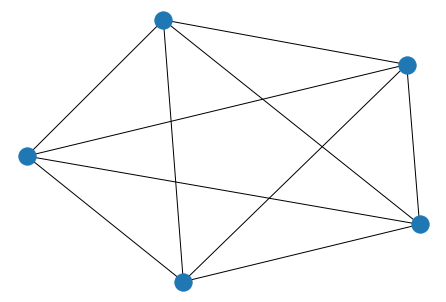

In [ ]:
###   Kuratowski féle K5 létrehozása (K5 gráf : 5 csúccsal és a teljes kétoldalú gráf )
## használat
%matplotlib inline  
## importálás
import networkx as nx
import matplotlib.pyplot as plt
## betőltés
K5 = nx.complete_graph(5)

nx.draw(K5)  
## alap írányítatlan megjelenítés / rajzokat a networkx készíti matplotlib használatával.
plt.show()

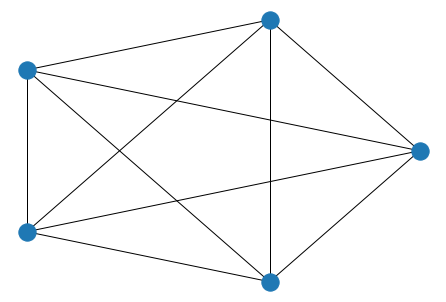

In [ ]:
## Lehetőség van a megjelenítés írányítására, tehát néhány dolgot a networkx, 
## míg másokat a matplotlib manipulálása irányítja majd.
nx.draw_circular(K5) ## körre kifeszített megjelenítés / kör alakú elrendezés // nx : networkx használata manipulálásra
plt.show()

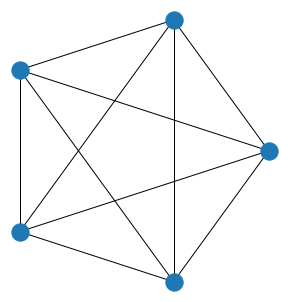

In [ ]:
nx.draw_circular(K5)
ax = plt.gca()
ax.set_aspect('equal')  ## oldal egyenlőség használata   // plt : matplotlib használata manipulálásra

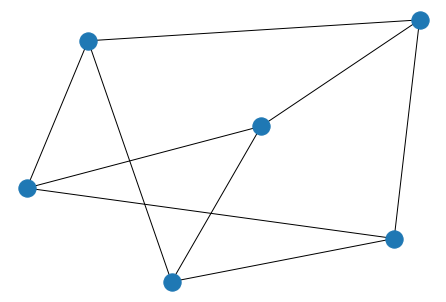

In [ ]:
## meg adjuk a csomópontok koordinátáit, és használni kell a draw () vagy a draw_networkx () függvényt a megjelenítéshez.
## A csomópontok kiszámítása is lehetséges.
K33 = nx.complete_bipartite_graph(3,3)
nx.draw(K33)
plt.show()

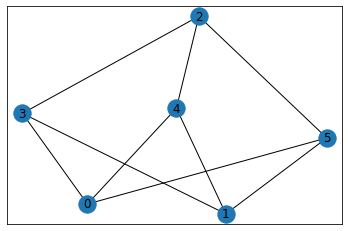

In [ ]:
## A networkx.draw_networkx függvény jobban irányítja a rajzot, és alapértelmezés szerint rajzolja a csomópontok számát is.
nx.draw_networkx(K33)

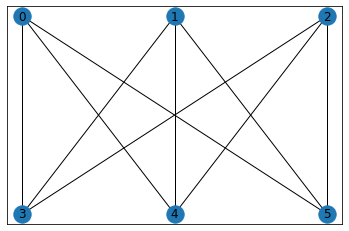

In [ ]:
positions = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}  ## poziciok megadása és kirajzolás
nx.draw_networkx(K33, positions)
plt.show()

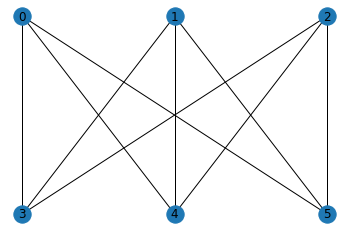

In [ ]:
## Vegyük figyelembe, hogy a matplotlib tengely már alapértelmezés szerint van rajzolva, ha a draw_networkx-ot használjuk. 
## Ki lehet kapcsolni a tengely rajzát, és át kell adnunk a tengelyt a draw_networkx () tételhez.

ax = plt.figure().gca()
ax.set_axis_off()
nx.draw_networkx(K33, positions)
plt.show()

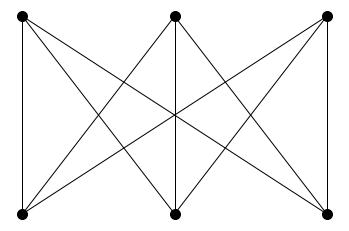

In [ ]:
## ha nem akarjuk, hogy a csomópontok színesek legyenek, vagy meg szeretnénk változtatni a színt, 
## vagy más formát szeretnénk a csomópontok számára, vagy máshogy akarjuk megcímkézni a csomópontokat. 
ax = plt.figure().gca()
ax.set_axis_off()
options = {'node_size' : 100, 'node_color' : 'k'}
nx.draw_networkx(K33, positions, with_labels=False, **options)
plt.show()

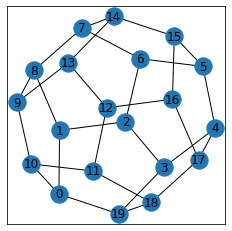

In [ ]:
## Hamilton Sir William Hamilton által 1859-ben létrehozott puzzle-ben jelenik meg. 
## Ebben a puzzle-ben a normál dodekaéder 20 csúcsa nevekkel van ellátva
## rajzoljuk a dodekaéder gráfot.
H = nx.dodecahedral_graph()
nx.draw_networkx(H)
plt.gca().set_aspect('equal')


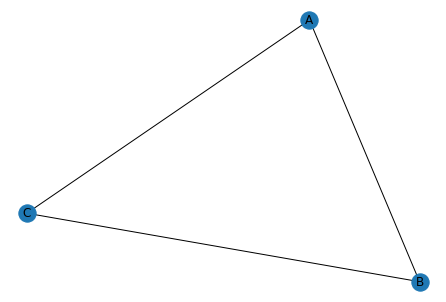

In [ ]:
G = nx.Graph()

G.add_node('A')
G.add_node('B')
G.add_node('C')

G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('A', 'C')

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

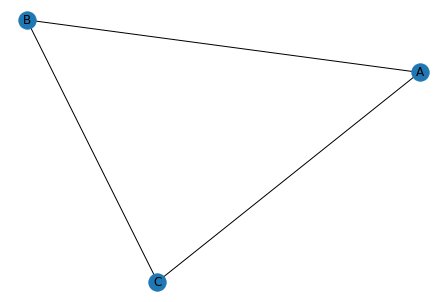

In [ ]:
G = nx.Graph()

G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

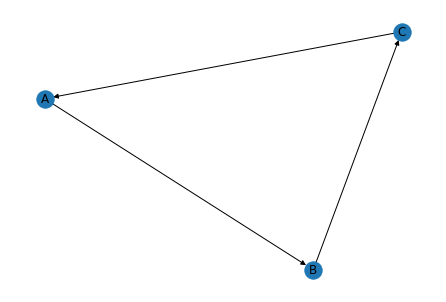

In [ ]:
## írányított
G = nx.DiGraph()

G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

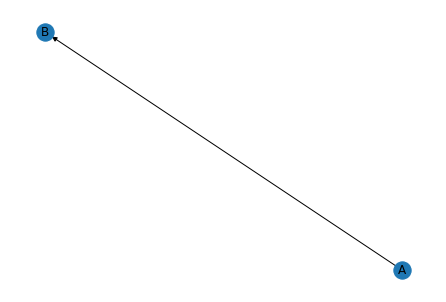

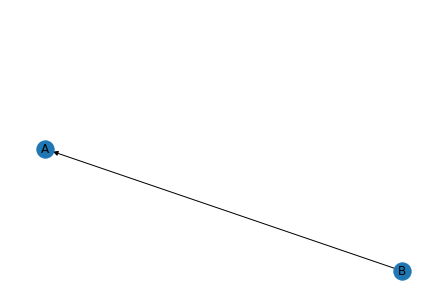

In [ ]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B')])

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

G = nx.DiGraph()
G.add_edges_from([('B', 'A')])

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

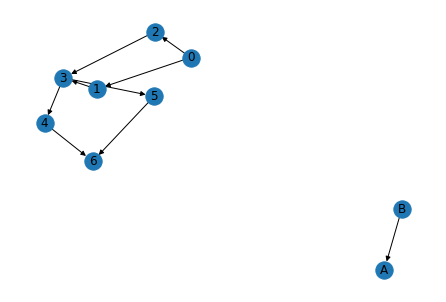

In [ ]:

G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([
    (0, 1),
    (0, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (3, 5),
    (4, 6),
    (5, 6),
])

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

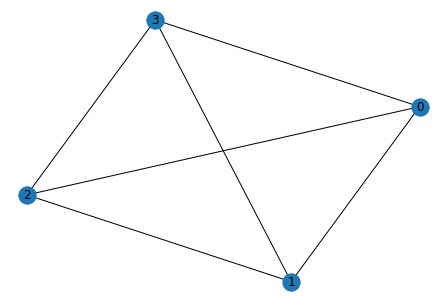

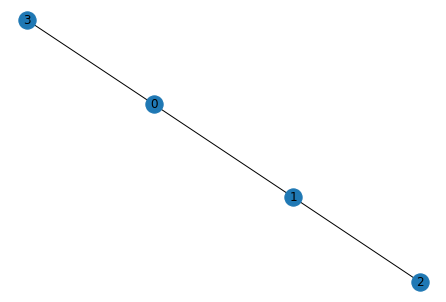

In [ ]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_weighted_edges_from([
    (0, 1, 1.0),
    (1, 2, 1.0),
    (2, 3, 1.0),
    (3, 0, 1.0),
    (0, 2, 2.0**.5),
    (1, 3, 2.0**.5),
])

T = nx.minimum_spanning_tree(G)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

plt.figure()
nx.draw(T, with_labels=True)
plt.show()

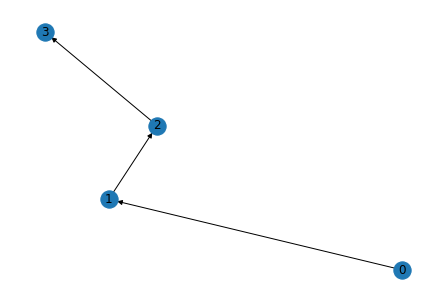

In [ ]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3])

G.add_weighted_edges_from([
    (0, 1, 4),
    (1, 2, 3),
    (2, 3, 6),
        
], weight='capacity')

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

Nodes of graph: ['0', '1', '2', '3', '4']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('2', '4'), ('3', '4')]


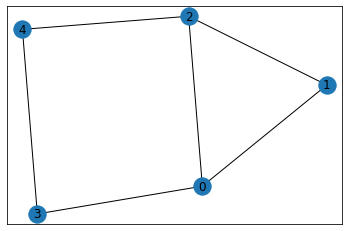

In [ ]:
import networkx as nx

G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4"])
G.add_edges_from([("0", "1"), ("1", "2"), ("2", "0"), ("0", "3"), ("2", "4"), ("3", "4")])

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))

nx.draw_networkx(G)

In [ ]:
m = nx.to_numpy_matrix(G)
print(m)

[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


\begin{pmatrix} 
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 \\
\end{pmatrix}


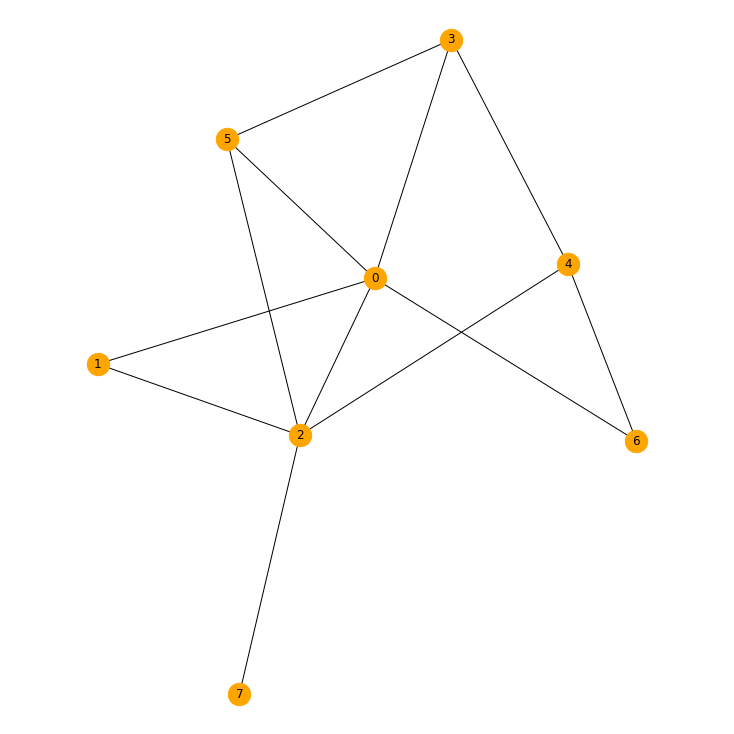

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
visiting 0
visiting neighbours of 0
stepping to edge (0, 1)
  visiting 1
  visiting neighbours of 1
  stepping to edge (1, 0)
    0 was already visited
  stepping to edge (1, 2)
    visiting 2
    visiting neighbours of 2
    stepping to edge (2, 0)
      0 was already visited
    stepping to edge (2, 1)
      1 was already visited
    stepping to edge (2, 4)
      visiting 4
      visiting neighbours of 4
      stepping to edge (4, 2)
        2 was already visited
      stepping to edge (4, 3)
        visiting 3
        visiting neighbours of 3
        stepping to edge (3, 0)
          0 was already visited
        stepping to edge (3, 4)
          4 was already visited
        stepping to edge (3, 5)
          visiting 5
          visiting neighbours of 5
          step

In [ ]:
import networkx as nx
import numpy as np

from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def depth_first_search(v, m, visited_vertices, depth):
    padding = "  "
    if v not in visited_vertices:
        print("{}visiting {}".format(padding*depth, v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        print("{}visiting neighbours of {}".format(padding*depth, v))
        for j in range(0, num_of_vertices):
            if m[v,j] != 0:
                print("{}stepping to edge ({}, {})".format(padding*depth, v, j))
                depth_first_search(j, m, visited_vertices, depth + 1)
    else:
        print("{}{} was already visited".format(padding*depth, v))


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
depth_first_search(0, nx.to_numpy_matrix(G), visited_vertices, 0)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

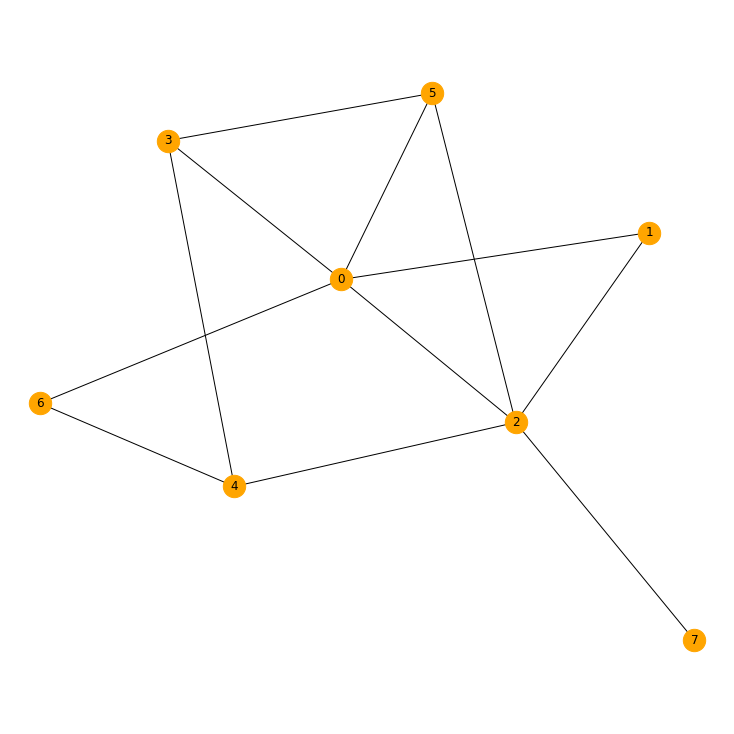

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 5
visiting 6
2 was already visited
visiting 4
5 was already visited
visiting 7
4 was already visited
5 was already visited
4 was already visited
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7]


In [ ]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

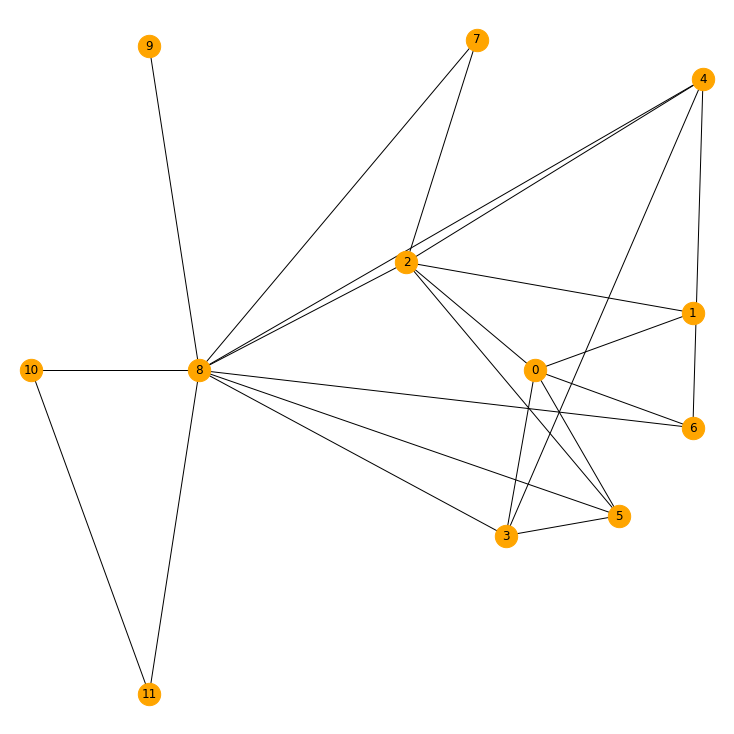

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('2', '8'), ('3', '4'), ('3', '5'), ('3', '8'), ('4', '6'), ('4', '8'), ('5', '8'), ('6', '8'), ('7', '8'), ('8', '9'), ('8', '10'), ('8', '11'), ('10', '11')]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 5
visiting 6
2 was already visited
visiting 4
5 was already visited
visiting 7
visiting 8
4 was already visited
5 was already visited
8 was already visited
8 was already visited
4 was already visited
8 was already visited
8 was already visited
8 was already visited
visiting 9
visiting 10
visiting 11
11 was already visited
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7, 8, 9, 10, 11]


In [ ]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7"),
                  ("7", "8"),
                  ("8", "2"),
                  ("8", "3"),
                  ("8", "4"),
                  ("8", "5"),
                  ("8", "6"),
                  ("8", "9"),
                  ("8", "10"),
                  ("8", "11"),
                  ("10", "11")])

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

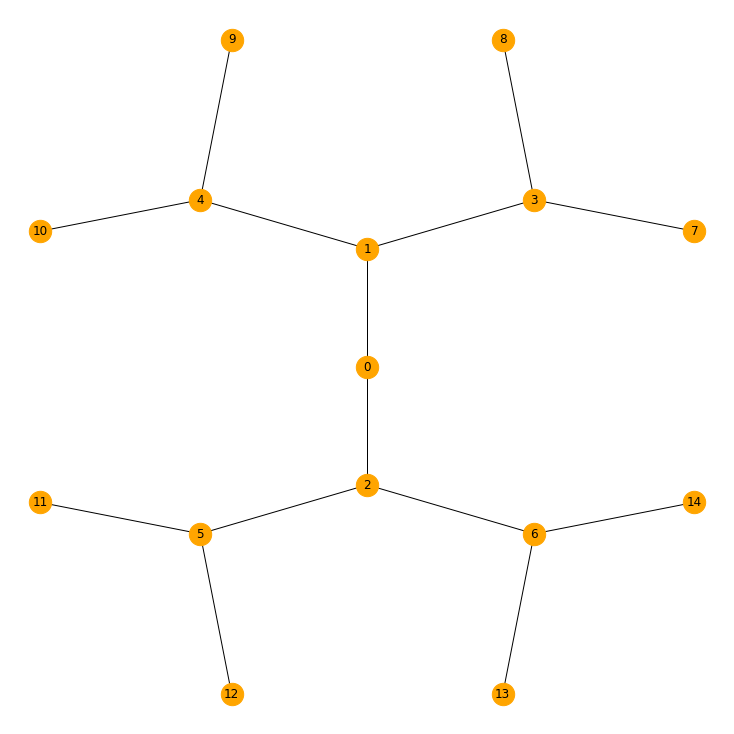

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

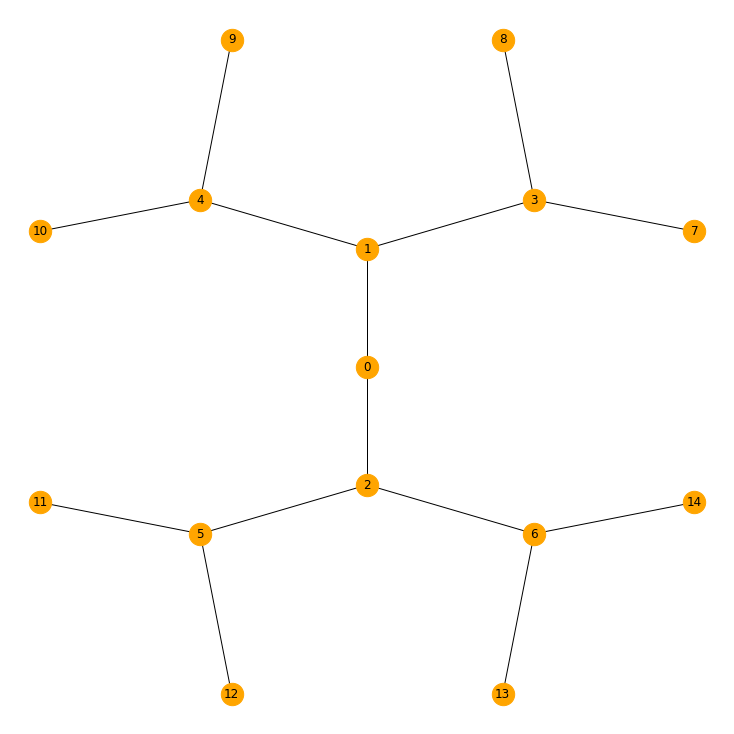

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

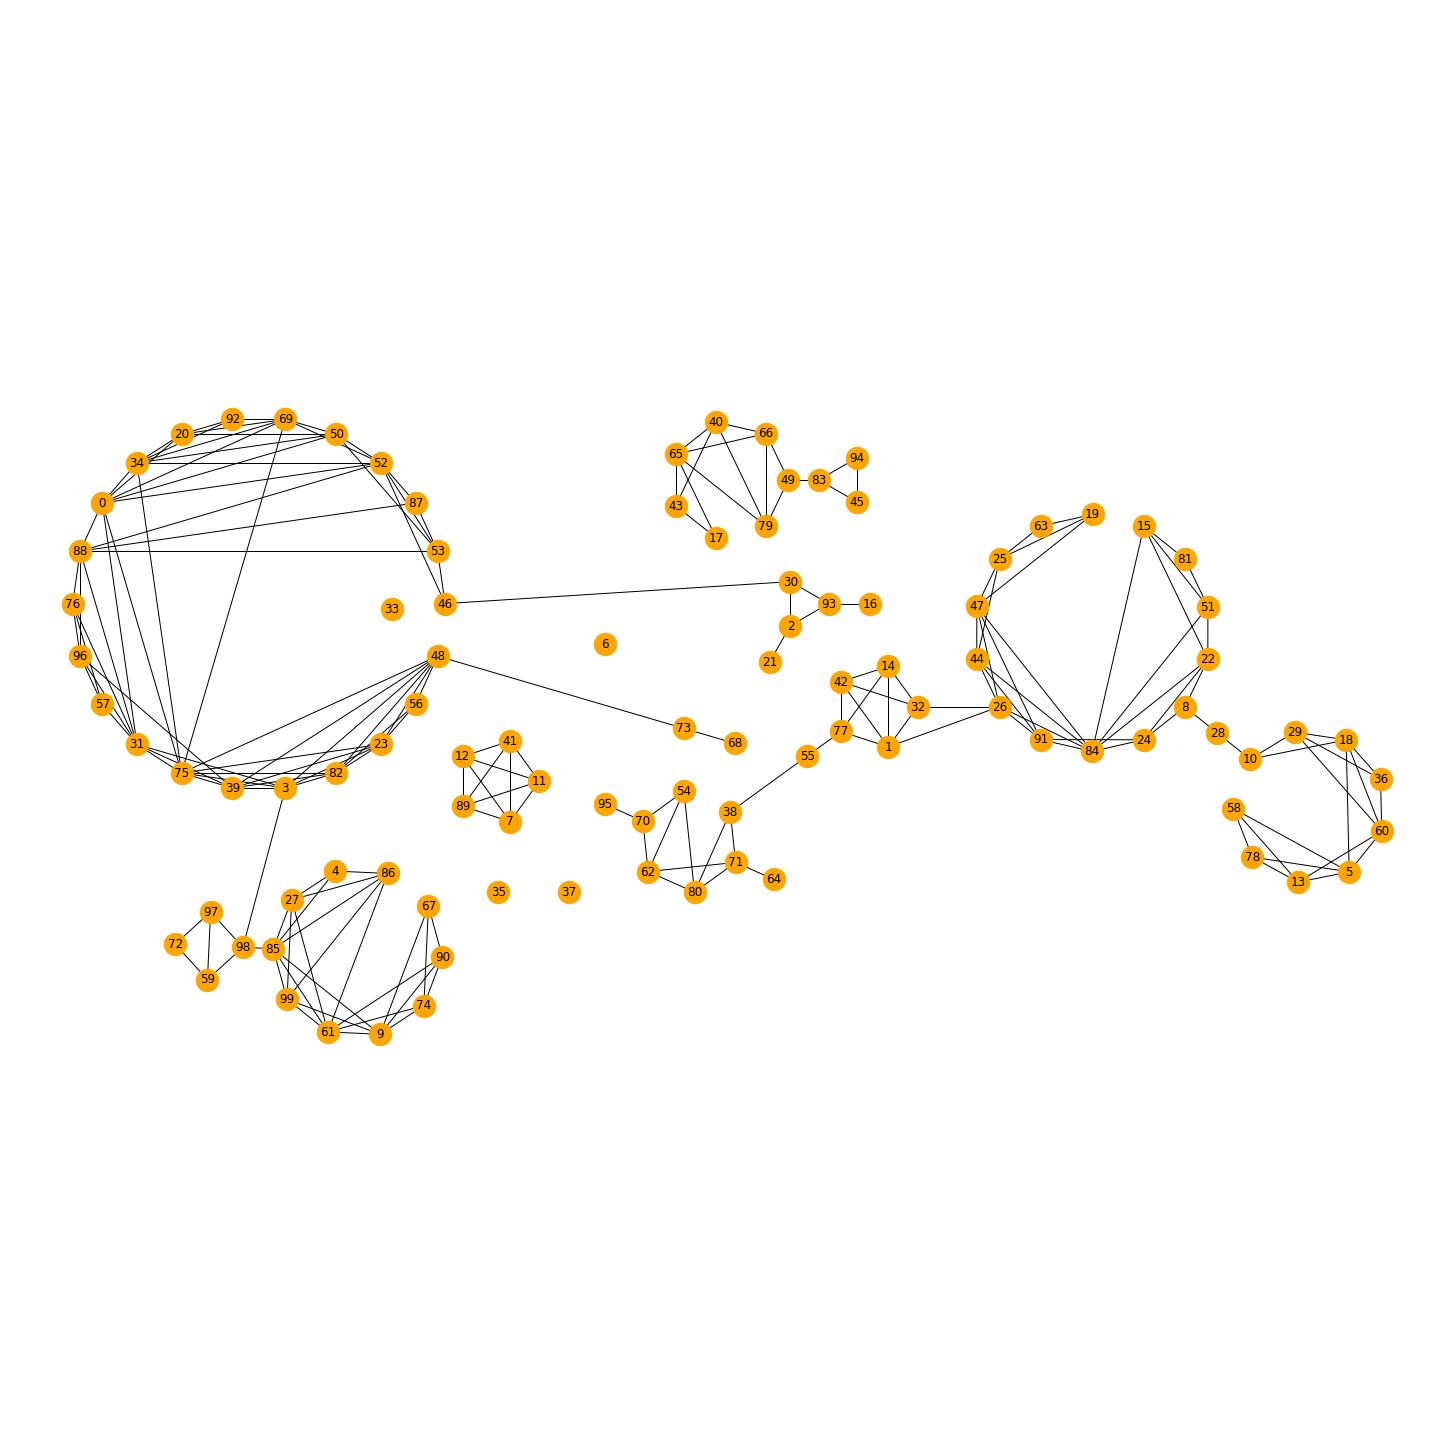

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(100, 0.125)
pos = graphviz_layout(G, prog='circo')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

---

#  ipycytoscape csomag használata

---

In [ ]:
### ha szükséges csomag  installásás 
!conda install -c conda-forge ipycytoscape -y
### vagy :
# !pip install --upgrade ipycytoscape

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\Anaconda3

  added / updated specs:
    - ipycytoscape


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipycytoscape-1.0.2         |             py_0         2.4 MB  conda-forge
    spectate-0.4.1             |     pyh9f0ad1d_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  ipycytoscape       conda-forge/noarch::ipycytoscape-1.0.2-py_0
  spectate           conda-forge/noarch::spectate-0.4.1-pyh9f0ad1d_0




ipycytoscape-1.0.2   | 2.4 MB    |            |   0% 
ipycytoscape-1.0.2   | 2.4 MB    |            |   1% 
ipycytoscape-1.0.2   | 2.4 MB    | #8         |  19% 
ipycytoscape-1.0.2   | 2.4 MB    | ####5      |  46% 
ipycytoscape

In [ ]:
import ipycytoscape
import json

In [ ]:
## json file megnyítás beolvasás
with open(r"colaData.json") as fi:
    json_file = json.load(fi)
    
## beállítások    
cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(json_file)

## paraméterezés, stilus beállítás
cytoscapeobj.set_style([{
                            'selector': 'node',
                            'css': {
                                'background-color': 'red'
                            }
                        },

                        {
                            'selector': 'edge',
                            'css': {
                                'line-color': 'pink'
                            }
                        }])

## megjelenítés
cytoscapeobj
## Használata: 
##   üres területen klikk és mozgatás (gráf pozicionlás)
##   node-n klikk és mozgatás csomopont mozgatása hozzákapcsolódó élekkel
##   egérgörgetés nagyítás kicsinyítés

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [ ]:
## json file megnyítás beolvasás
with open(r"DAGData.json") as fi:
    json_file = json.load(fi)
    
## beállítások    
cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(json_file)

## paraméterezés, stilus beállítás
cytoscapeobj.set_layout(name='dagre', nodeSpacing=10, edgeLengthVal=10)
cytoscapeobj.set_style([{
                        'selector': 'node',
                        'css': {
                            'background-color': '#11479e'
                            }
                        },
                        {
                        'selector': 'node:parent',
                        'css': {
                            'background-opacity': 0.333
                            }
                        },
                        {
                            'selector': 'edge',
                            'style': {
                                'width': 4,
                                'line-color': '#9dbaea',
                                'target-arrow-shape': 'triangle',
                                'target-arrow-color': '#9dbaea',
                                'curve-style': 'bezier'
                            }
                        }])

## megjelenítés
cytoscapeobj


CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'nodeSpacing': 10, 'edgeLengthVal': 10}, cytoscape_style=[{…

In [ ]:
## json file megnyítás beolvasás
with open(r"concentricData.json") as fi:
    json_file = json.load(fi)
    
## beállítások    
cytoscapeobj = ipycytoscape.CytoscapeWidget()
cytoscapeobj.graph.add_graph_from_json(json_file)

## paraméterezés, stilus beállítás
cytoscapeobj.set_layout(name='concentric')
cytoscapeobj.set_style([{
                          "selector":"node",
                          "style":{
                             "height":20,
                             "width":20,
                             "background-color":"#30c9bc"
                          }
                       },
                       {
                          "selector":"edge",
                          "style":{
                             "curve-style":"haystack",
                             "haystack-radius":0,
                             "width":5,
                             "opacity":0.5,
                             "line-color":"#a8eae5"
                          }
                       }])

## megjelenítés
cytoscapeobj

CytoscapeWidget(cytoscape_layout={'name': 'concentric'}, cytoscape_style=[{'selector': 'node', 'style': {'heig…

In [ ]:
## json file megnyítás beolvasás
with open(r"geneData.json") as fi:
    json_file = json.load(fi)
    
## beállítások  betöltése a style dictionary
with open("geneStyle.json") as fi:
    s = json.load(fi)
    
cyto = ipycytoscape.CytoscapeWidget()
cyto.graph.add_graph_from_json(json_file)
## paraméterezés, stilus beállítás
cyto.set_style(s)


## megjelenítés
cyto

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'core', 'style': {'selection-…

In [ ]:
import ipycytoscape
import ipywidgets as widgets
import networkx as nx

cytoscapeobj = ipycytoscape.CytoscapeWidget()
button = widgets.Button(description="Létrehozás gomb")
output = widgets.Output()

# Generalás nyomógomb blikkelési eseményre
def on_button_clicked(b):
    with output:
        cytoscapeobj.graph.add_graph_from_networkx(nx.complete_graph(5))

button.on_click(on_button_clicked)
widgets.HBox([button, cytoscapeobj])

In [ ]:
##  hálozat megjelenítés módosítása dinamikusan

nx_graph = nx.complete_graph(8)  
## átalakítás 8 szögre

## használt algoritmus 
nx.shortest_path(nx_graph, 1, 3)

cytoscapeobj.graph.add_graph_from_networkx(nx_graph)
## megjelenítés eredeti ábrába

cytoscapeobj.set_layout(name='grid', nodeSpacing=10, edgeLengthVal=10)
cytoscapeobj.graph.add_graph_from_networkx(nx.complete_graph(5))
cytoscapeobj

CytoscapeWidget(cytoscape_layout={'name': 'grid', 'nodeSpacing': 10, 'edgeLengthVal': 10}, cytoscape_style=[{'…